In [1]:
from skimage.io import imread
from skimage.morphology import square,ball,diamond

from scipy import ndimage
from skimage import morphology as mph

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from skimage import data, io, filters
import warnings
warnings.filterwarnings('ignore')

from PIL import Image

bin_img =  data.coins() > 120
im = np.array(Image.open('img1.png'))
image_r = im[:,:,0]
image_g = im[:,:,1]
image_b = im[:,:,2]

In [2]:
bin_img =  data.coins() > 120
im = np.array(Image.open('img1.png'))
image_r = im[:,:,0]
image_g = im[:,:,1]
image_b = im[:,:,2]

In [3]:
struct1 = square(2)
struct2 = diamond(4)
struct3 = ndimage.generate_binary_structure(3, 2)

## Бинарное изображение

In [4]:
dilation = mph.dilation(bin_img, struct1)
erosion = mph.erosion(bin_img, struct1)
closing = mph.closing(bin_img, struct1)
opening = mph.opening(bin_img, struct1)

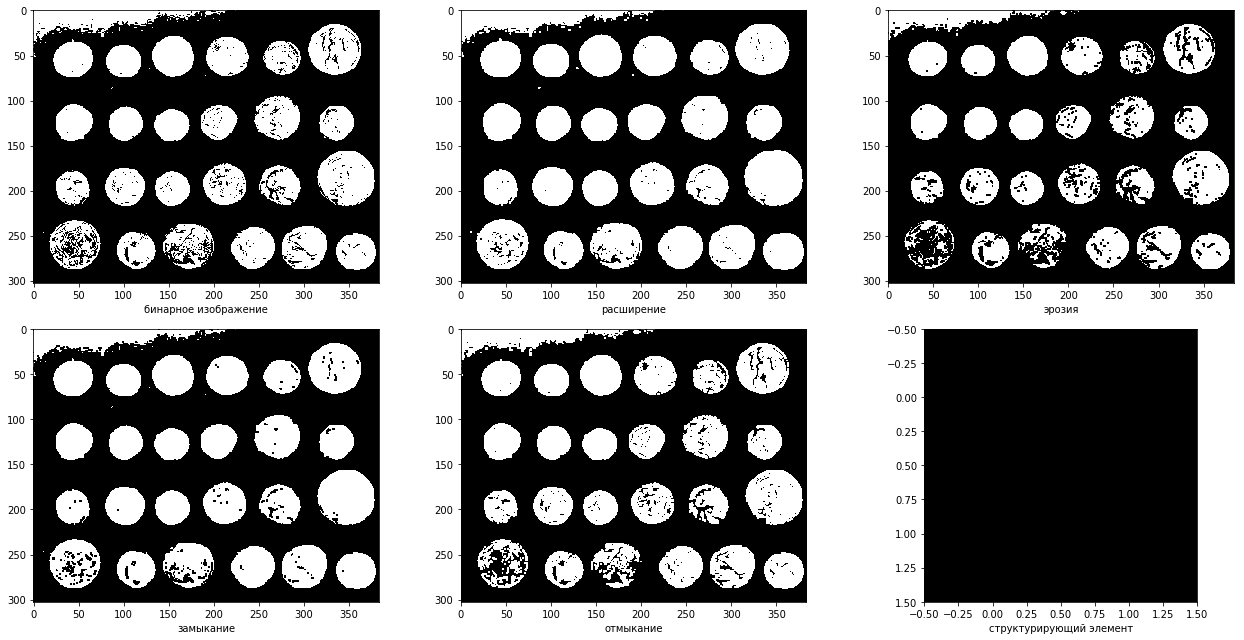

In [5]:
def plot(img,d,e,c,o,s):
    fig, ((ax0, ax1, ax2),(ax3,ax4, ax5) )= plt.subplots(nrows=2, ncols=3, figsize=(18, 9))

    ax0.imshow(img, cmap='gray')
    ax0.set_xlabel("бинарное изображение")

    ax1.imshow(d, cmap='gray')
    ax1.set_xlabel("расширение")

    ax2.imshow(e, cmap='gray')
    ax2.set_xlabel("эрозия") 


    ax3.imshow(c, cmap='gray')
    ax3.set_xlabel("замыкание")
    ax4.imshow(o, cmap='gray')
    ax4.set_xlabel("отмыкание")

    ax5.imshow(s, cmap='gray')
    ax5.set_xlabel("структурирующий элемент")

    fig.tight_layout()
    plt.show()

plot(bin_img,dilation,erosion,closing,opening,struct1)

## Полутоновые изображения

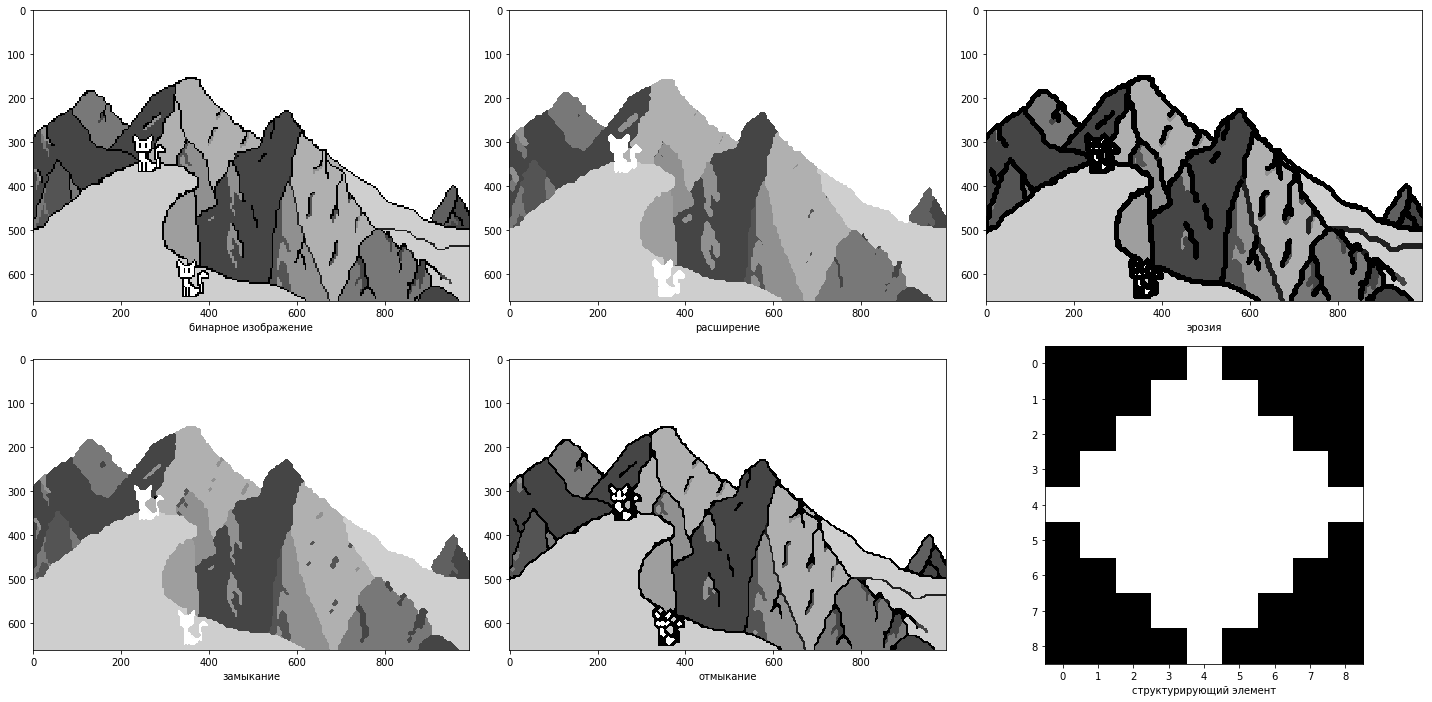

In [206]:
dilation = mph.dilation(image_r, struct2)
erosion = mph.erosion(image_r, struct2)
closing = mph.closing(image_r, struct2)
opening = mph.opening(image_r, struct2)
plot(image_r,dilation,erosion,closing,opening,struct2)

##  Цветные изображения

1. Наивный способ, изменяющий цвет изображения

In [202]:
dilation = mph.dilation(im, struct3)
erosion = mph.erosion(im, struct3)
closing = mph.closing(im, struct3)
opening = mph.opening(im, struct3)

In [203]:
s = struct2+1

for i in range(3):
    for j in range(3):
        for k in range(3):
            if s[i,j,k] == 2:
                s[i,j,k] = 200
            else :
                s[i,j,k] = 130

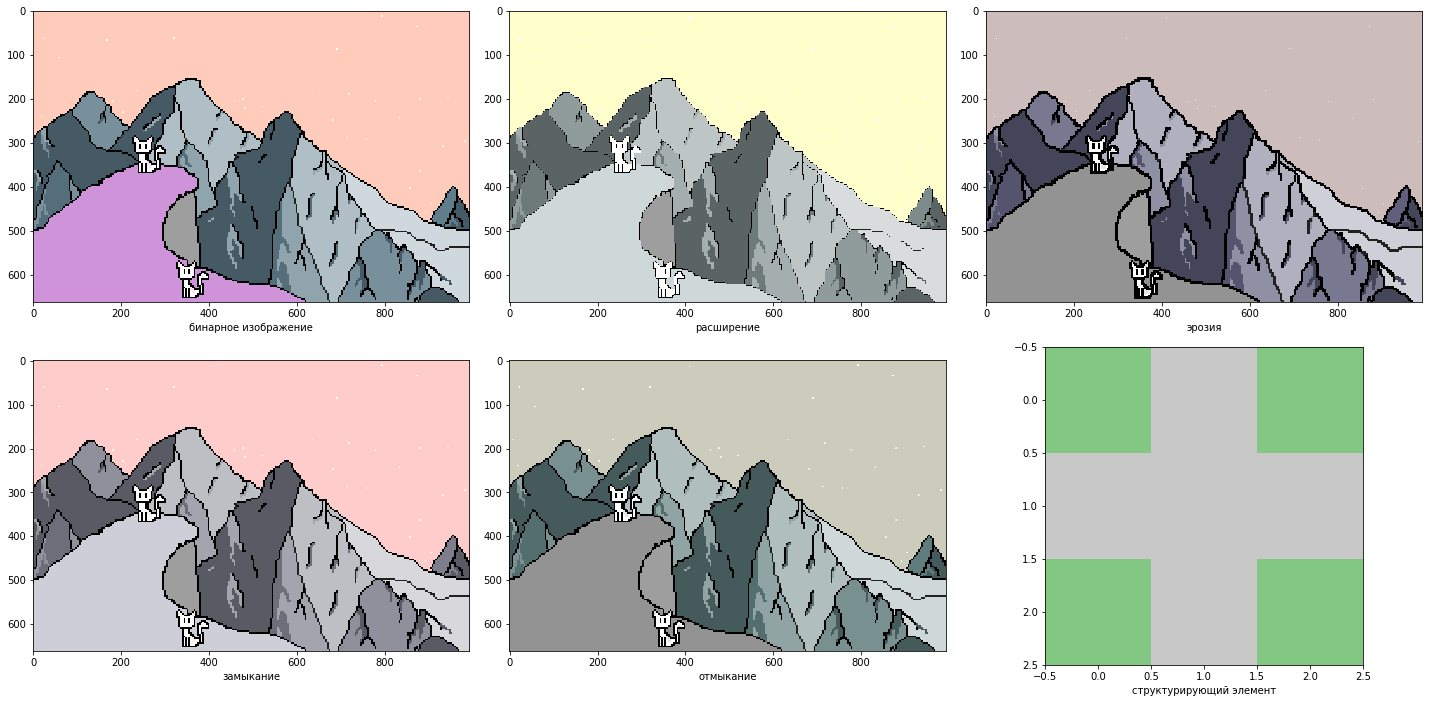

In [204]:
plot(im,dilation,erosion,closing,opening,s)

2. Менее наивный способ обработки цветного изображения

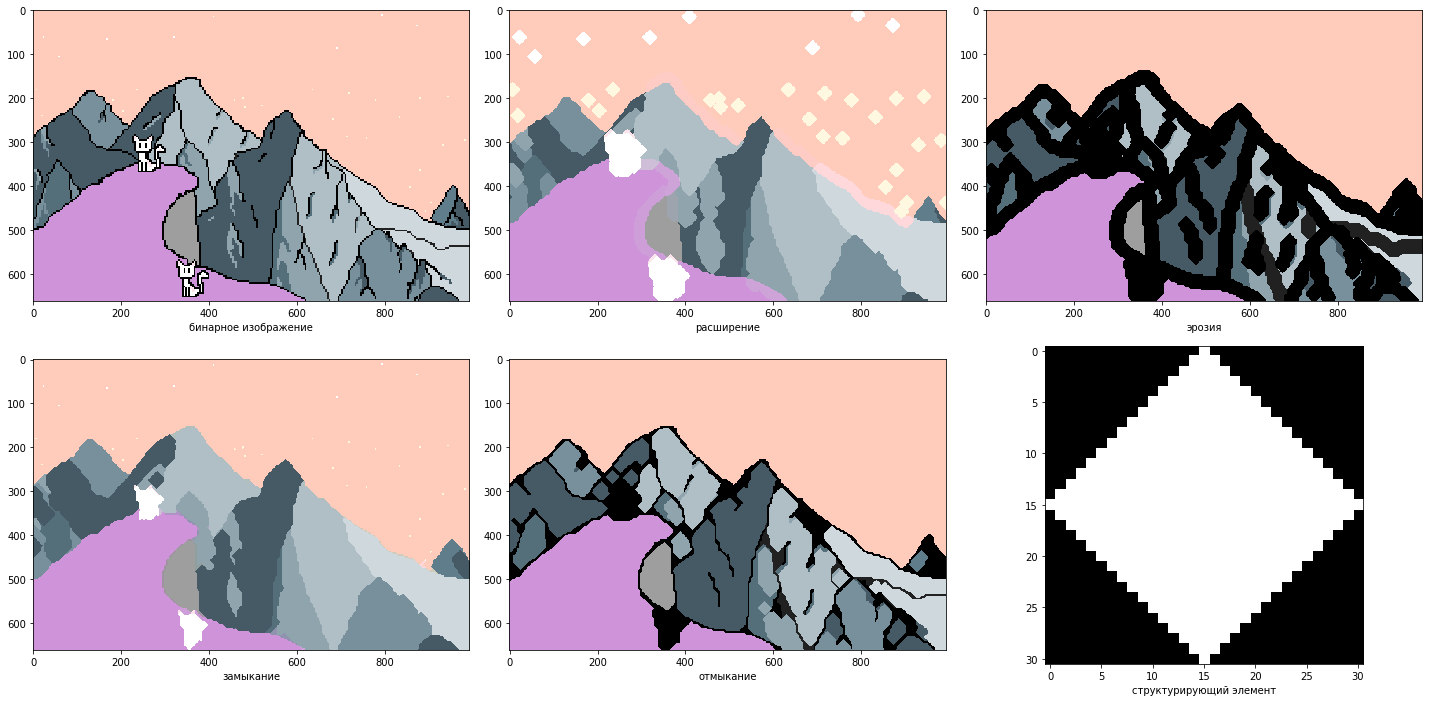

In [205]:
se = diamond(15)

image_rgb_dilation_result = np.zeros(shape=(662,993,3),dtype=int)
image_rgb_dilation_result[:,:,0] = mph.dilation(image_r,se)
image_rgb_dilation_result[:,:,1] = mph.dilation(image_g,se)
image_rgb_dilation_result[:,:,2] = mph.dilation(image_b,se)

image_rgb_erosion_result = np.zeros(shape=(662,993,3),dtype=int)
image_rgb_erosion_result[:,:,0] = mph.erosion(image_r,se)
image_rgb_erosion_result[:,:,1] = mph.erosion(image_g,se)
image_rgb_erosion_result[:,:,2] =mph.erosion(image_b,se)

image_rgb_opening_result = np.zeros(shape=(662,993,3),dtype=int)
image_rgb_opening_result[:,:,0] = mph.opening(image_r,se)
image_rgb_opening_result[:,:,1] = mph.opening(image_g,se)
image_rgb_opening_result[:,:,2] = mph.opening(image_b,se)

image_rgb_closing_result = np.zeros(shape=(662,993,3),dtype=int)
image_rgb_closing_result[:,:,0] = mph.closing(image_r,se)
image_rgb_closing_result[:,:,1] = mph.closing(image_g,se)
image_rgb_closing_result[:,:,2] =mph.closing(image_b,se)

plot(im,image_rgb_dilation_result,image_rgb_erosion_result,image_rgb_closing_result,image_rgb_opening_result,se)